<a href="https://colab.research.google.com/github/Harshitahegde-30/Titanic-Survival-Prediction/blob/main/TitanicSurvival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# Load dataset (replace path with your file location)
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# View first 5 rows
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [24]:
print("Dataset shape:", df.shape)


Dataset shape: (891, 12)


In [25]:
print("Column names:", df.columns.tolist())


Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [27]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [28]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [29]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q' nan]


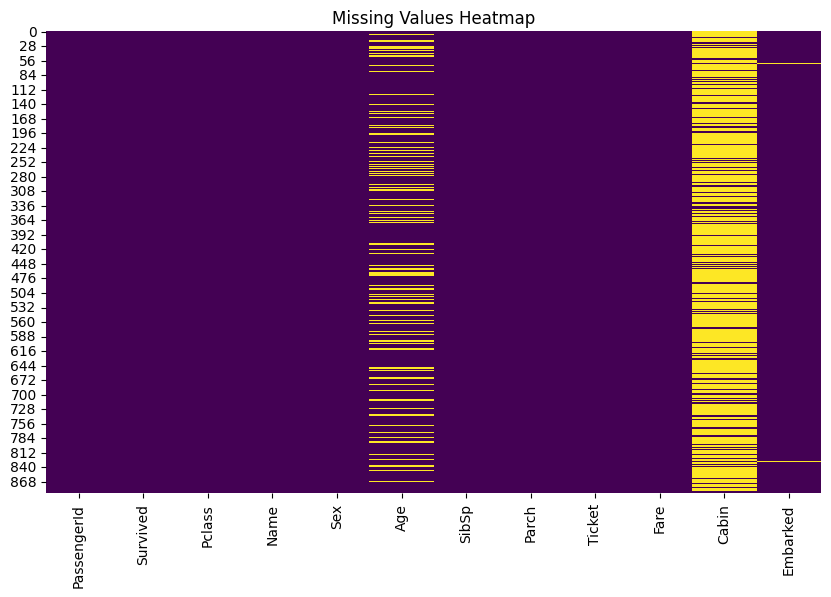

In [30]:
#3. Exploratory Data Analysis (EDA) - Visualizations
# --- Missing Values Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

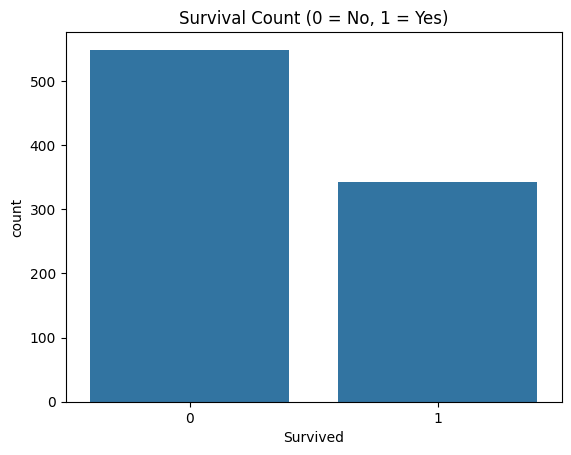

In [31]:
# --- Survival Count
sns.countplot(x="Survived", data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()


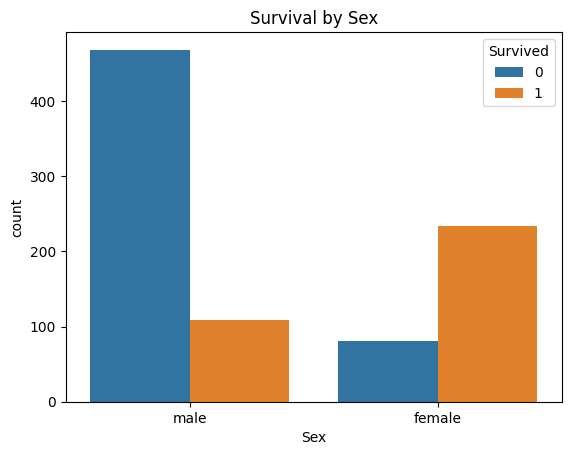

In [32]:
# --- Survival by Sex
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Sex")
plt.show()

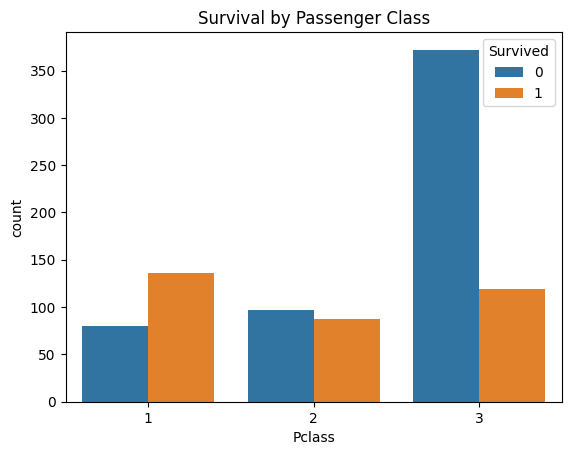

In [33]:
# --- Survival by Passenger Class
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()

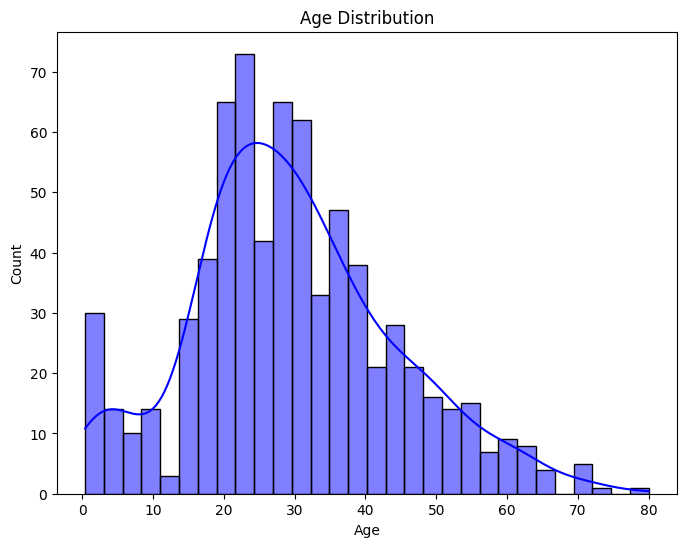

In [34]:
# --- Age Distribution
plt.figure(figsize=(8,6))
sns.histplot(df["Age"].dropna(), kde=True, bins=30, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



/tmp/ipython-input-1953437669.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Survived"]==1]["Age"], label="Survived", shade=True)
/tmp/ipython-input-1953437669.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Survived"]==0]["Age"], label="Did Not Survive", shade=True)


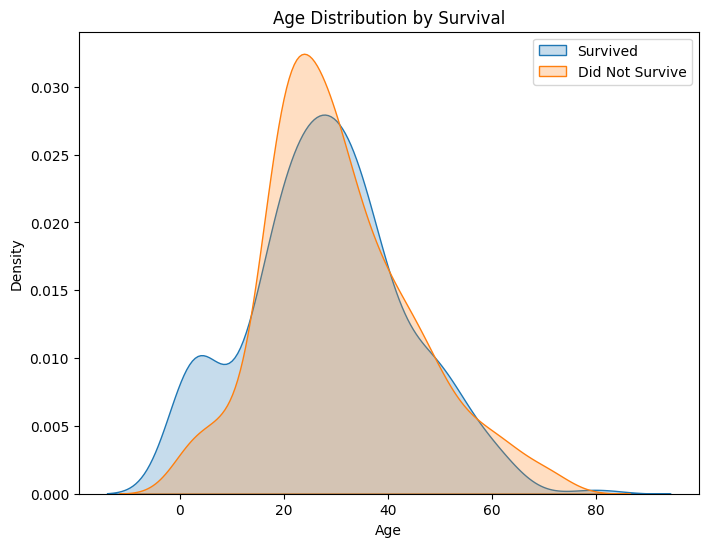

In [35]:
# --- Age vs Survival
plt.figure(figsize=(8,6))
sns.kdeplot(df[df["Survived"]==1]["Age"], label="Survived", shade=True)
sns.kdeplot(df[df["Survived"]==0]["Age"], label="Did Not Survive", shade=True)
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()

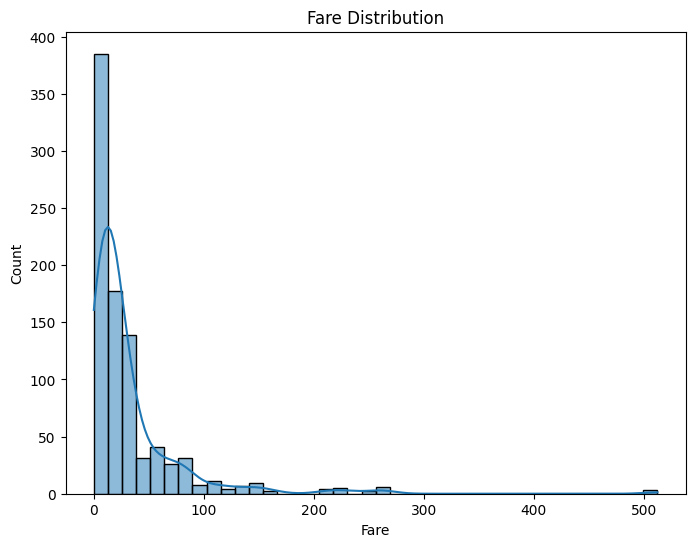

In [36]:
# --- Fare Distribution
plt.figure(figsize=(8,6))
sns.histplot(df["Fare"], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()

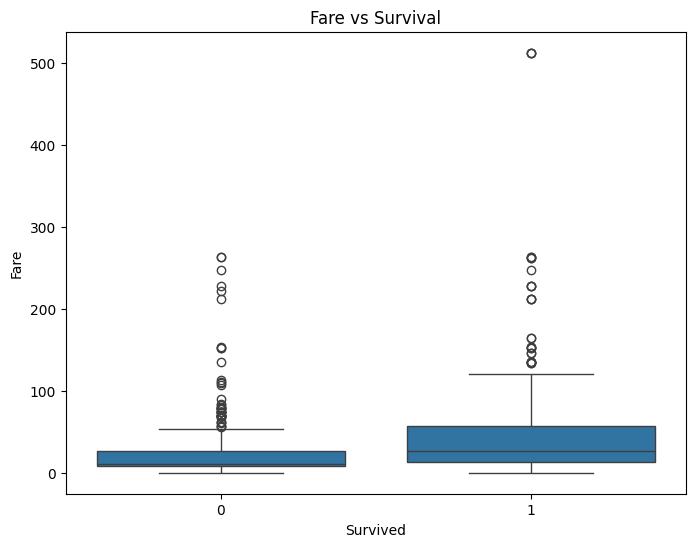

In [37]:
# --- Survival by Fare
plt.figure(figsize=(8,6))
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare vs Survival")
plt.show()


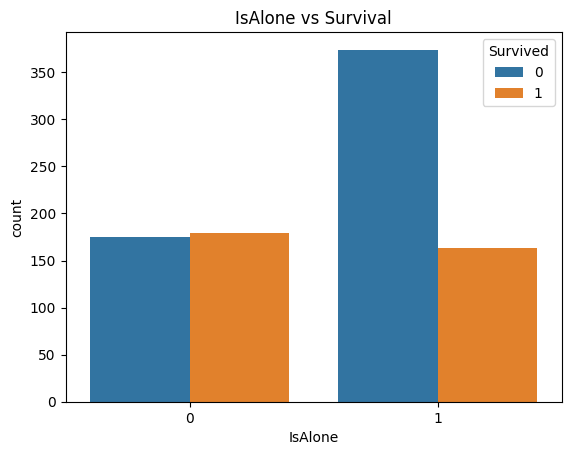

In [38]:
# --- Create IsAlone feature
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 0, 'IsAlone'] = 1

# --- IsAlone vs Survival
sns.countplot(x="IsAlone", hue="Survived", data=df)
plt.title("IsAlone vs Survival")
plt.show()

# --- Title vs Survival (after feature engineering)
if "Title" in df.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x="Title", hue="Survived", data=df)
    plt.title("Title vs Survival")
    plt.show()

In [39]:
# ======================
# Handling Missing Values
# ======================

# Check missing values
print("Missing values before handling:")
print(df.isnull().sum())

# ---- Age ----
# Strategy: Fill missing Age with median (less sensitive to outliers)
df["Age"].fillna(df["Age"].median(), inplace=True)

# ---- Cabin ----
# Strategy: Many values missing → mark them as "Missing"
df["Cabin"] = df["Cabin"].fillna("Missing")

# ---- Embarked (extra check) ----
# Fill with mode (most frequent value)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Verify again
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
IsAlone          0
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
IsAlone        0
dtype: int64


/tmp/ipython-input-2559793854.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-2559793854.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [40]:
# 3.1 Age: fill by median grouped by Sex & Pclass (better than global median)
if "Age" in df.columns:
    df["Age"] = df.groupby(["Sex","Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))
    df["Age"] = df["Age"].fillna(df["Age"].median())

# 3.2 Fare: fill with median
if "Fare" in df.columns:
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# 3.3 Embarked: fill with mode
if "Embarked" in df.columns:
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# 3.4 Cabin: keep raw cabin or mark missing with 'U' (unknown)
if "Cabin" in df.columns:
    df["Cabin"] = df["Cabin"].fillna("Unknown")

In [41]:
# FamilySize
df["FamilySize"] = 0
if {"SibSp","Parch"}.issubset(df.columns):
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
else:
    # default if columns missing
    df["FamilySize"] = 1

# IsAlone
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

# Title extraction from Name
if "Name" in df.columns:
    df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.", expand=False).str.strip()
    # normalize rare titles
    common_titles = ["Mr","Mrs","Miss","Master"]
    df["Title"] = df["Title"].apply(lambda t: t if t in common_titles else "Rare")
else:
    df["Title"] = "Unknown"

# Cabin deck: first letter of Cabin (A,B,C...) replace Unknown or NaN with 'U'
if "Cabin" in df.columns:
    df["CabinDeck"] = df["Cabin"].astype(str).str[0].replace({"U":"U","n":"U"})
else:
    df["CabinDeck"] = "U"

# Fare per person (useful when families split fare)
df["FarePerPerson"] = df["Fare"] / df["FamilySize"]
df["FarePerPerson"] = df["FarePerPerson"].replace([np.inf, -np.inf], np.nan).fillna(df["Fare"].median())

In [42]:
# AgeBand (bins)
bins = [0, 12, 20, 40, 60, 120]
labels = ["Child","Teen","Adult","Middle","Senior"]
df["AgeBand"] = pd.cut(df["Age"], bins=bins, labels=labels)

# FamilySizeBand
df["FamilySizeBand"] = pd.cut(df["FamilySize"], bins=[0,1,4,20], labels=["1","2-4","5+"], right=True)

In [43]:
to_one_hot = [c for c in ["Sex","Embarked","Title","CabinDeck","AgeBand","FamilySizeBand"] if c in df.columns]
df_encoded = pd.get_dummies(df, columns=to_one_hot, drop_first=True)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler



In [45]:
numeric_cols = [c for c in ["Age","Fare","FamilySize","FarePerPerson"] if c in df.columns]
categorical_cols = [c for c in ["Pclass","Sex","Embarked","Title","CabinDeck","AgeBand","FamilySizeBand"] if c in df.columns]

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [46]:
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

In [47]:
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
], remainder="drop")

X = df[numeric_cols + categorical_cols]  # features only
X_processed = preprocessor.fit_transform(X)

In [48]:
keep = [
    "PassengerId", "Survived", "Pclass", "Age", "Fare",
    "FamilySize", "IsAlone", "FarePerPerson", "Title", "CabinDeck",
    "Embarked", "Sex"
]
keep_existing = [c for c in keep if c in df.columns]
df_processed = df[keep_existing].copy()

In [49]:
# No nulls in critical columns (after imputation)
critical = ["PassengerId","Age","Fare","FamilySize","IsAlone"]
for c in critical:
    if c in df_processed.columns:
        assert df_processed[c].isnull().sum() == 0, f"Nulls found in {c}"

# FamilySize constraints
assert (df_processed["FamilySize"] >= 1).all()

# Basic summary
print(df_processed.describe(include="all").T)
print("Value counts sample (IsAlone):\n", df_processed["IsAlone"].value_counts())

               count unique   top freq       mean         std   min     25%  \
PassengerId    891.0    NaN   NaN  NaN      446.0  257.353842   1.0   223.5   
Survived       891.0    NaN   NaN  NaN   0.383838    0.486592   0.0     0.0   
Pclass         891.0    NaN   NaN  NaN   2.308642    0.836071   1.0     2.0   
Age            891.0    NaN   NaN  NaN  29.361582   13.019697  0.42    22.0   
Fare           891.0    NaN   NaN  NaN  32.204208   49.693429   0.0  7.9104   
FamilySize     891.0    NaN   NaN  NaN   1.904602    1.613459   1.0     1.0   
IsAlone        891.0    NaN   NaN  NaN   0.602694    0.489615   0.0     0.0   
FarePerPerson  891.0    NaN   NaN  NaN  19.916375   35.841257   0.0    7.25   
Title            891      5    Mr  517        NaN         NaN   NaN     NaN   
CabinDeck        891      9     M  687        NaN         NaN   NaN     NaN   
Embarked         891      3     S  646        NaN         NaN   NaN     NaN   
Sex              891      2  male  577        NaN   

In [50]:
import os
os.makedirs("data/processed", exist_ok=True)

In [51]:
df.to_csv("data/processed/titanic_clean.csv", index=False)
print("✅ Cleaned dataset saved successfully!")

✅ Cleaned dataset saved successfully!


This makes pipeline reusable. Each time run the pipeline, it overwrites the cleaned dataset.

In [52]:
def transform_data(df):
    # cleaning + feature engineering steps
    df["Age"].fillna(df["Age"].median(), inplace=True)

    # Save cleaned dataset
    os.makedirs("../data/processed", exist_ok=True)
    df.to_csv("../data/processed/titanic_clean.csv", index=False)

    print("✅ Cleaned dataset saved into processed/ folder")
    return df

In [53]:
import sqlite3
import pandas as pd
# Load the cleaned Titanic dataset
df = pd.read_csv("data/processed/titanic_clean.csv")
print("✅ Cleaned dataset loaded successfully!")

✅ Cleaned dataset loaded successfully!


In [56]:
conn = sqlite3.connect("titanic.db")

# Execute SQL queries using pd.read_sql()
query_limit = """
SELECT * FROM titanic_clean LIMIT 10;
"""
result_limit = pd.read_sql(query_limit, conn)
print("First 10 rows:")
print(result_limit)

query_name_age = """
SELECT Name, Age FROM titanic_clean;
"""
result_name_age = pd.read_sql(query_name_age, conn)
print("\nNames and Ages:")
print(result_name_age.head()) # Print head to avoid excessive output

# Close the connection
conn.close()

First 10 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   
5                                   Moran, Mr. James    0  28.0      0      0   
6                    

In [58]:
conn = sqlite3.connect("titanic.db")

# Execute SQL queries using pd.read_sql()
query_limit = """
SELECT COUNT(*) AS total_passengers FROM titanic_clean;
"""
print("Total number of passengers:", pd.read_sql(query_limit, conn))
# Close the connection
conn.close()

Total number of passengers:    total_passengers
0               891


In [59]:
# Connect to SQLite database (creates titanic.db if it doesn't exist)
conn = sqlite3.connect("titanic.db")

# Save dataframe into a table called 'passengers'
df.to_sql("passengers", conn, if_exists="replace", index=False)

print("✅ Data stored in SQLite successfully!")

✅ Data stored in SQLite successfully!


In [60]:
# Example: survival rate by gender
query = """
SELECT Sex, AVG(Survived) as survival_rate
FROM passengers
GROUP BY Sex;
"""

result = pd.read_sql(query, conn)
print(result)

# Close connection
conn.close()


      Sex  survival_rate
0  female       0.742038
1    male       0.188908


Survival Rate by Passenger Class - Checks if 1st class passengers had a better chance of survival than 2nd or 3rd.

In [61]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect("titanic.db")

query = """
SELECT Pclass, AVG(Survived) AS survival_rate
FROM passengers
GROUP BY Pclass
ORDER BY Pclass;
"""

result = pd.read_sql(query, conn)
print(result)

# Close connection
conn.close()

   Pclass  survival_rate
0       1       0.629630
1       2       0.472826
2       3       0.242363


Average Age of Survivors vs Non-Survivors -Tells if younger passengers were more likely to survive.

In [62]:
conn = sqlite3.connect("titanic.db")
query = """
SELECT Survived, AVG(Age) AS avg_age
FROM passengers
GROUP BY Survived;
"""
result = pd.read_sql(query, conn)
print(result)
conn.close()

   Survived    avg_age
0         0  30.028233
1         1  28.291433


Top 5 Oldest Survivors- Finds the oldest people who survived.

In [63]:
conn = sqlite3.connect("titanic.db")
query = """
SELECT Name, Age, Sex, Pclass
FROM passengers
WHERE Survived = 1
ORDER BY Age DESC
LIMIT 5;
"""
result = pd.read_sql(query, conn)
print(result)
conn.close()

                                        Name   Age     Sex  Pclass
0       Barkworth, Mr. Algernon Henry Wilson  80.0    male       1
1          Andrews, Miss. Kornelia Theodosia  63.0  female       1
2                     Turkula, Mrs. (Hedwig)  63.0  female       3
3                         Harris, Mr. George  62.0    male       2
4  Stone, Mrs. George Nelson (Martha Evelyn)  62.0  female       1


Number of Survivors & Deaths by Gender-A breakdown of how many men vs women survived or died.

In [64]:
conn = sqlite3.connect("titanic.db")
query = """
SELECT Sex, Survived, COUNT(*) AS count
FROM passengers
GROUP BY Sex, Survived
ORDER BY Sex, Survived;
"""
result = pd.read_sql(query, conn)
print(result)
conn.close()

      Sex  Survived  count
0  female         0     81
1  female         1    233
2    male         0    468
3    male         1    109


Survival by age group (child, adult, senior).

In [65]:
conn = sqlite3.connect("titanic.db")
query = """
SELECT CASE
         WHEN Age < 18 THEN 'Child'
         WHEN Age BETWEEN 18 AND 50 THEN 'Adult'
         ELSE 'Senior'
       END AS AgeGroup,
       AVG(Survived) AS survival_rate
FROM passengers
GROUP BY AgeGroup;
"""
result = pd.read_sql(query, conn)
print(result)
conn.close()

  AgeGroup  survival_rate
0    Adult       0.362745
1    Child       0.539823
2   Senior       0.343750


Correlation between fare and survival (basic).

In [66]:
conn = sqlite3.connect("titanic.db")
query = """
SELECT CASE WHEN Fare > 50 THEN 'High Fare' ELSE 'Low Fare' END AS FareGroup,
       AVG(Survived) AS survival_rate
FROM passengers
GROUP BY FareGroup;
"""
result = pd.read_sql(query, conn)
print(result)
conn.close()

   FareGroup  survival_rate
0  High Fare       0.681250
1   Low Fare       0.318741


In [67]:
import os
print(os.listdir())

['.config', 'titanic.db', 'data', 'drive', 'sample_data']


In [68]:
#!/usr/bin/env python3
"""
etl_pipeline.py

Run: python etl_pipeline.py --input ../data/raw/train.csv --db_path ../data/processed/titanic.db

This script:
 - Extracts raw CSV
 - Transforms (clean + feature engineering)
 - Loads processed table into SQLite DB
 - Logs steps and handles errors
"""

import argparse
import logging
import os
import sqlite3
import sys
from pathlib import Path

import pandas as pd

# -------------------------
# Logging setup
# -------------------------
LOG_DIR = Path("../logs")
LOG_DIR.mkdir(parents=True, exist_ok=True)
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s %(levelname)s %(message)s",
    handlers=[
        logging.StreamHandler(sys.stdout),
        logging.FileHandler(LOG_DIR / "etl_pipeline.log"),
    ],
)
logger = logging.getLogger(__name__)


In [10]:
# -------------------------
# Extract
# -------------------------
def extract(input_csv: str) -> pd.DataFrame:
    """Read CSV into pandas DataFrame."""
    try:
        logger.info("Starting extraction from: %s", input_csv)
        df = pd.read_csv(input_csv)
        logger.info("Extracted %d rows, %d columns", df.shape[0], df.shape[1])
        return df
    except FileNotFoundError:
        logger.exception("Input CSV not found: %s", input_csv)
        raise
    except Exception:
        logger.exception("Failed to extract data from %s", input_csv)
        raise


In [11]:
# =========================
# 1. EXTRACT
# =========================
def extract(file_path):
    print("📥 Extracting data...")
    df = pd.read_csv(file_path)
    print(f"✅ Data extracted: {df.shape[0]} rows, {df.shape[1]} columns")
    return df


In [12]:
# =========================
# 2. TRANSFORM
# =========================
def transform(df):
    print("🔄 Transforming data...")

    # Handle missing values
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df.drop(columns=['Cabin'], inplace=True)

    # Encode categorical variables
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

    # Feature engineering
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    print("✅ Transformation complete.")
    return df

In [13]:
# =========================
# 3. LOAD
# =========================
def load(df, csv_path, db_path):
    print("💾 Loading data...")

    # Save to processed folder
    os.makedirs(os.path.dirname(csv_path), exist_ok=True)
    df.to_csv(csv_path, index=False)
    print(f"✅ Cleaned dataset saved at: {csv_path}")

    # Save to SQLite database
    conn = sqlite3.connect(db_path)
    df.to_sql("titanic_clean", conn, if_exists="replace", index=False)
    conn.close()
    print(f"✅ Data loaded into database: {db_path}")


In [14]:
# =========================
# MAIN PIPELINE
# =========================
if __name__ == "__main__":
    raw_file = "/content/drive/MyDrive/Titanic-Dataset.csv"
    processed_file = "data/processed/titanic_clean.csv"
    database_file = "titanic.db"

    # Run pipeline
    df_raw = extract(raw_file)
    df_clean = transform(df_raw)
    load(df_clean, processed_file, database_file)

    print("🎉 ETL Pipeline completed successfully!")

📥 Extracting data...
✅ Data extracted: 891 rows, 12 columns
🔄 Transforming data...
✅ Transformation complete.
💾 Loading data...
✅ Cleaned dataset saved at: data/processed/titanic_clean.csv
✅ Data loaded into database: titanic.db
🎉 ETL Pipeline completed successfully!


/tmp/ipython-input-3027099650.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3027099650.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [15]:
pip install prefect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.4/144.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 351.2/351.2 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.1/754.1 kB 26.3 MB/s eta 0:00:00


In [16]:
from prefect import flow, task
import pandas as pd
import sqlite3
import os

@task
def extract(file_path):
    return pd.read_csv(file_path)


In [17]:
@task
def transform(df):
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df.drop(columns=['Cabin'], inplace=True)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    return df


In [18]:
@task
def load(df, csv_path, db_path):
    os.makedirs(os.path.dirname(csv_path), exist_ok=True)
    df.to_csv(csv_path, index=False)

    conn = sqlite3.connect(db_path)
    df.to_sql("titanic_clean", conn, if_exists="replace", index=False)
    conn.close()

In [69]:
flow
def etl_pipeline():
    raw_file = "/content/drive/MyDrive/Titanic-Dataset.csv"
    processed_file = "/content/drive/MyDrive/titanic_project/data/processed/titanic_clean.csv"
    database_file = "/content/drive/MyDrive/titanic_project/titanic.db"

    df_raw = extract(raw_file)
    df_clean = transform(df_raw)
    load(df_clean, processed_file, database_file)

etl_pipeline()

INFO:prefect:Starting temporary server on http://127.0.0.1:8066
See https://docs.prefect.io/v3/concepts/server#how-to-guides for more information on running a dedicated Prefect server.
INFO:prefect.task_runs:Finished in state Completed()
/tmp/ipython-input-200151736.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-200151736.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace metho

In [73]:
import joblib
import os

# Create the 'models' directory if it doesn't exist
os.makedirs("models", exist_ok=True)

joblib.dump(rf, "models/titanic_rf_model.pkl")

['models/titanic_rf_model.pkl']

In [76]:
from sklearn.model_selection import train_test_split

# Assume df is your cleaned Titanic dataset
# Features (X) = all columns except 'Survived'
# Target (y) = 'Survived'
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (712, 18)
Test set shape: (179, 18)


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'Survived' is the target variable and the rest are features
# We need to split the data into features (X) and target (y)
# Using the processed data 'df_processed'
# We also need to ensure the features are in a format that can be used by the model.
# Since we have already created 'X_processed' using ColumnTransformer in a previous step, we can use that.
# We also need the target variable 'y' from the original or processed dataframe.

y = df_processed['Survived']
# X_processed is already created using preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize model
lr = LogisticRegression(max_iter=1000)

# Train model on training data
lr.fit(X_train, y_train)

# Predict on test data
y_pred = lr.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", round(accuracy * 100, 2), "%")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 82.12 %

Confusion Matrix:
 [[89 16]
 [16 58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build Model
nn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')   # binary classification
])

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
nn.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# Evaluate
loss, acc = nn.evaluate(X_test, y_test)
print("Neural Network Accuracy:", acc)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5874 - loss: 0.6670
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7121 - loss: 0.5384
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8274 - loss: 0.4560
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8323 - loss: 0.4207
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8318 - loss: 0.3915
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8391 - loss: 0.4072
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8528 - loss: 0.3620
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8272 - loss: 0.3965
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8697 - loss: 0.3548
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8240 - loss: 0.4130
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8518 - loss: 0.3675
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8376 - loss: 0.3920


In [78]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))


XGBoost Accuracy: 0.7988826815642458


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:06:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [81]:
models = {
    "Logistic Regression": lr.score(X_test, y_test),
    "Random Forest": rf.score(X_test, y_test),
    "XGBoost": accuracy_score(y_test, xgb_preds),
    "Neural Network": acc
}

for model, score in models.items():
    print(model, ":", round(score*100, 2), "%")


Logistic Regression : 82.12 %
Random Forest : 81.01 %
XGBoost : 79.89 %
Neural Network : 81.56 %


In [82]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
rf_preds = rf.predict(X_test)

# Evaluate
rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", round(rf_acc * 100, 2), "%")


Random Forest Accuracy: 81.01 %


In [84]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

dt_acc = accuracy_score(y_test, dt_preds)
print("Decision Tree Accuracy:", round(dt_acc * 100, 2), "%")

Decision Tree Accuracy: 85.47 %


In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

knn_acc = accuracy_score(y_test, knn_preds)
print("KNN Accuracy:", round(knn_acc * 100, 2), "%")

KNN Accuracy: 79.89 %


In [86]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

nb_acc = accuracy_score(y_test, nb_preds)
print("Naive Bayes Accuracy:", round(nb_acc * 100, 2), "%")

Naive Bayes Accuracy: 77.65 %


In [87]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

lgb_acc = accuracy_score(y_test, lgb_preds)
print("LightGBM Accuracy:", round(lgb_acc * 100, 2), "%")


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [89]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.1 MB/s eta 0:00:00


In [90]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)
cat_preds = cat_model.predict(X_test)

cat_acc = accuracy_score(y_test, cat_preds)
print("CatBoost Accuracy:", round(cat_acc * 100, 2), "%")

CatBoost Accuracy: 83.24 %


In [91]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel="linear", probability=True, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    results.append([name, acc, prec, rec, f1])

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

print(results_df)

# Optional: Sort by Accuracy
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print("\nSorted Results:\n", results_df)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:25:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.821229   0.783784  0.783784  0.783784
1        Decision Tree  0.854749   0.815789  0.837838  0.826667
2        Random Forest  0.810056   0.763158  0.783784  0.773333
3                  KNN  0.798883   0.771429  0.729730  0.750000
4          Naive Bayes  0.776536   0.680851  0.864865  0.761905
5                  SVM  0.826816   0.811594  0.756757  0.783217
6              XGBoost  0.798883   0.771429  0.729730  0.750000
7             LightGBM  0.810056   0.777778  0.756757  0.767123
8             CatBoost  0.832402   0.814286  0.770270  0.791667

Sorted Results:
                  Model  Accuracy  Precision    Recall  F1-Score
1        Decision Tree  0.854749   0.815789  0.837838  0.826667
8             CatBoost  0.832402   0.814286  0.770270  0.791667
5                  SVM  0.826816   0.811594  0.756757  0.783217
0  Logistic Regression  0.821229   0.783784  0.783784  0.783784
2        Random Forest